In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('survey_results_public2021.csv') #changed the source
data_lastyear = pd.read_csv('survey_results_public2020.csv')
pd.set_option('display.max_columns', 100) # displays enough columns
# for working with salaries the problem is that total money and purchasing power are different? f.e compare India and US
# focus on US/EU?
#gender/race pay gap present in developer industry? if so, did it get better over time?
#difference in behaviour if NEWStuck depending on gender, age, education?

In [2]:
data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [3]:
data.filter(['MainBranch', 'Employment','Country', 'EdLevel', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'NEWStuck', 'Age', 'Gender', 'Ethnicity', 'MentalHealth', 'ConvertedCompYearly' ])

,MainBranch,Employment,Country,EdLevel,Age1stCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,NEWStuck,Age,Gender,Ethnicity,MentalHealth,ConvertedCompYearly
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,Call a coworker or friend;Visit Stack Overflow...,25-34 years old,Man,White or of European descent,None of the above,62268.0
1,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,7,NaN,JavaScript;Python,NaN,Visit Stack Overflow;Google it,18-24 years old,Man,White or of European descent,None of the above,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,Visit Stack Overflow;Google it;Watch help / tu...,18-24 years old,Man,Prefer not to say,None of the above,NaN
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,JavaScript;TypeScript,JavaScript;TypeScript,Call a coworker or friend;Visit Stack Overflow...,35-44 years old,Man,White or of European descent,NaN,NaN
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,17,10,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Visit Stack Overflow;Go for a walk or other ph...,25-34 years old,Man,White or of European descent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,6,5,Clojure;Kotlin;SQL,Clojure,Call a coworker or friend;Google it,25-34 years old,Man,White or of European descent,I have a concentration and/or memory disorder ...,160500.0
83435,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,4,2,NaN,NaN,Call a coworker or friend;Visit Stack Overflow...,18-24 years old,Man,Black or of African descent,None of the above,3960.0
83436,I am a developer by profession,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",11 - 17 years,10,4,Groovy;Java;Python,Java;Python,Call a coworker or friend;Visit Stack Overflow...,25-34 years old,Man,White or of European descent,None of the above,90000.0
83437,I am a developer by profession,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,5,3,Bash/Shell;JavaScript;Node.js;Python,Go;Rust,Call a coworker or friend;Visit Stack Overflow...,25-34 years old,Man,White or of European descent,I have a mood or emotional disorder (e.g. depr...,816816.0


In [4]:
1 - (data['MentalHealth'].isna().sum() + (data['MentalHealth'] == 'None of the above').sum()) /data.shape[0] # 1 out of 4 is not without health problems? that sounds like a lot
# sadly this question was not asked in any surveys pre Covid as far as I could see

0.24522105969630503

In [5]:
df = data.groupby(['YearsCode']).median()['ConvertedCompYearly']

<AxesSubplot:xlabel='YearsCode'>

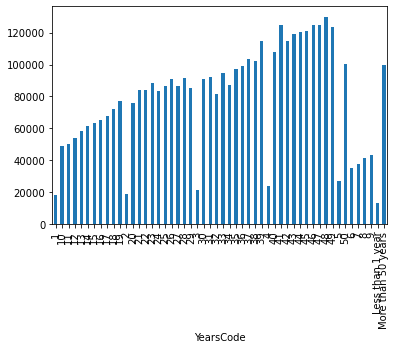

In [6]:
df.plot.bar() #how to sort the columns, why doenst it work the right way automatically?

In [8]:
#gender/race pay gap present in developer industry? if so, did it get better over time (todo?)?
#do we have enough data?
data.shape[0]-data['ConvertedCompYearly'].isna().sum()
#46844 is enough
data['ConvertedCompYearly'].median()

56211.0

In [9]:
data['Gender'].value_counts() #Most answered binary, so the others are statiscally irrelevant.

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              21
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:        

In [10]:
GenderSalary = data.groupby(['Gender', 'Country'])['ConvertedCompYearly']

In [11]:
(GenderSalary.median()['Man']/GenderSalary.median()['Woman'])['United States of America'] - 1 #percentage of more income of men

0.17592592592592582

In [12]:
(GenderSalary.median()['Man']/GenderSalary.median()['Woman'])['Germany'] - 1

0.15386668089875655

In [14]:
top_ten=data['Country'].value_counts().nlargest(10)
((GenderSalary.median()['Man']/GenderSalary.median()['Woman'])-1)[top_ten.index] #top_ten = highest surveyed countries, for others the values become unusable
# is this represantive? what happend in poland?
# for germany the results are only 3% off, this site says 18% for 2020 https://www.destatis.de/DE/Themen/Arbeit/Arbeitsmarkt/Qualitaet-Arbeit/Dimension-1/gender-pay-gap.html

United States of America                                0.175926
India                                                   0.271088
Germany                                                 0.153867
United Kingdom of Great Britain and Northern Ireland    0.276600
Canada                                                  0.111109
France                                                  0.197962
Brazil                                                  0.171553
Poland                                                  0.625185
Netherlands                                             0.252742
Italy                                                   0.152965
Name: ConvertedCompYearly, dtype: float64

<AxesSubplot:>

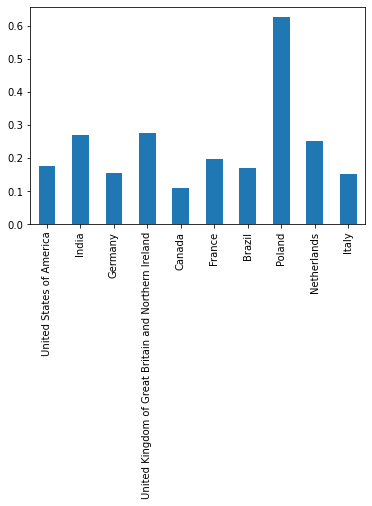

In [15]:
((GenderSalary.median()['Man']/GenderSalary.median()['Woman'])-1)[top_ten.index].plot.bar()

In [ ]:
#lets do the same for race? (todo?)

In [16]:
EdLevelSalary = data.groupby(['EdLevel'])['ConvertedCompYearly'].median().sort_values()

<AxesSubplot:xlabel='EdLevel'>

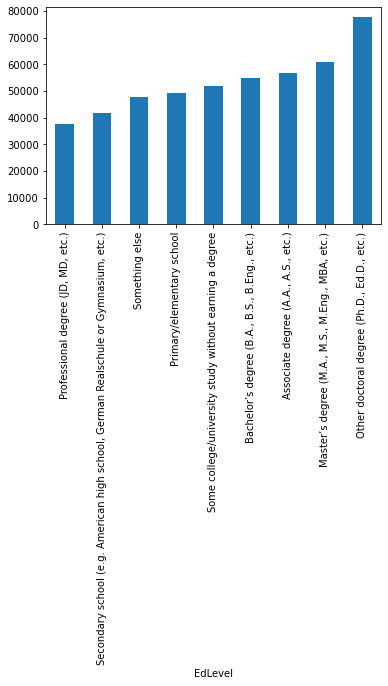

In [17]:
EdLevelSalary.plot.bar()

In [18]:
#check for missed values
#List of all the coloumns with missing values
data.isna().any()

ResponseId                      False
MainBranch                      False
Employment                       True
Country                         False
US_State                         True
UK_Country                       True
EdLevel                          True
Age1stCode                       True
LearnCode                        True
YearsCode                        True
YearsCodePro                     True
DevType                          True
OrgSize                          True
Currency                         True
CompTotal                        True
CompFreq                         True
LanguageHaveWorkedWith           True
LanguageWantToWorkWith           True
DatabaseHaveWorkedWith           True
DatabaseWantToWorkWith           True
PlatformHaveWorkedWith           True
PlatformWantToWorkWith           True
WebframeHaveWorkedWith           True
WebframeWantToWorkWith           True
MiscTechHaveWorkedWith           True
MiscTechWantToWorkWith           True
ToolsTechHav

In [19]:
print('Number of columns with missing values:',len(data.columns[data.isnull().any()].to_list()))

Number of columns with missing values: 45


In [20]:
#Percentage of missing values
data.isnull().sum()/data.shape[0] *100

ResponseId                       0.000000
MainBranch                       0.000000
Employment                       0.139024
Country                          0.000000
US_State                        82.118674
UK_Country                      94.705114
EdLevel                          0.375124
Age1stCode                       0.234902
LearnCode                        0.570477
YearsCode                        2.154868
YearsCodePro                    26.633828
DevType                         20.320234
OrgSize                         27.221084
Currency                        26.796822
CompTotal                       43.452103
CompFreq                        37.499251
LanguageHaveWorkedWith           1.296756
LanguageWantToWorkWith           7.931543
DatabaseHaveWorkedWith          16.650487
DatabaseWantToWorkWith          30.129795
PlatformHaveWorkedWith          37.517228
PlatformWantToWorkWith          50.120447
WebframeHaveWorkedWith          26.045374
WebframeWantToWorkWith          37

In [21]:
#columns with more than 75% missing values
print(data.columns[data.isnull().mean()>0.75].to_list())
print('Number of columns with more the 75% missing values:',len(data.columns[data.isnull().mean()>0.75].to_list()))

['US_State', 'UK_Country']
Number of columns with more the 75% missing values: 2


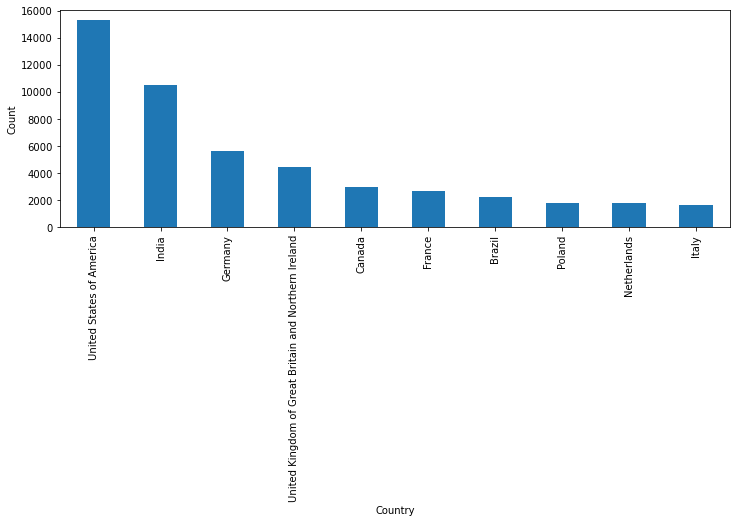

In [22]:
#Highest Surveyed Countries

top_ten=data['Country'].value_counts().nlargest(10)


plt.subplots(figsize=(12,4))
top_ten.plot.bar()
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [23]:
# EDA on used programming languages in this survey

temp=data['LanguageHaveWorkedWith'].dropna() #clean data
print(temp)
language=[]
for i in temp:
    if isinstance(i, int):
        print('int value.. no need to split') #reason: I just could't get rid of that value! it's the last one so 'break' helped
        break
    x = i.split(";")
    language.append(x)
    
import itertools
languages=list(itertools.chain.from_iterable(language))
languages=list(set(languages)) #remove duplicated values
print(languages)

0        C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                    JavaScript;Python
2                             Assembly;C;Python;R;Rust
3                                JavaScript;TypeScript
4                       Bash/Shell;HTML/CSS;Python;SQL
                             ...                      
83433    Java;JavaScript;Kotlin;Objective-C;TypeScript
83434                               Clojure;Kotlin;SQL
83436                               Groovy;Java;Python
83437             Bash/Shell;JavaScript;Node.js;Python
83438           Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 82357, dtype: object
['Clojure', 'Dart', 'Java', 'Perl', 'APL', 'Node.js', 'LISP', 'C++', 'Go', 'Kotlin', 'Scala', 'Crystal', 'HTML/CSS', 'Groovy', 'COBOL', 'Bash/Shell', 'Erlang', 'Delphi', 'C', 'F#', 'JavaScript', 'Swift', 'Elixir', 'PHP', 'TypeScript', 'Rust', 'SQL', 'Matlab', 'Julia', 'Python', 'Assembly', 'C#', 'VBA', 'Haskell', 'Objective-C', 'R', '

In [24]:
#count users of the used languages

used_languages={} #cant we do that with pandas instead of dictionaries?
for i in languages:
    used_languages[i]=(data['LanguageHaveWorkedWith'].apply(lambda x: i in str(x).split(';')).value_counts()[1])
print(used_languages)
df_lan = pd.DataFrame({'Language' : used_languages.keys() , 'Users' : used_languages.values() })
#df_lan = df_lan.sort_values('Users').iloc[::-1] # sorting
#pd.DataFrame.from_dict(used_languages,orient='index',columns=['Users'])

{'Clojure': 1552, 'Dart': 4965, 'Java': 29162, 'Perl': 2028, 'APL': 536, 'Node.js': 27975, 'LISP': 1096, 'C++': 20057, 'Go': 7879, 'Kotlin': 6866, 'Scala': 2148, 'Crystal': 466, 'HTML/CSS': 46259, 'Groovy': 2479, 'COBOL': 437, 'Bash/Shell': 22385, 'Erlang': 651, 'Delphi': 1731, 'C': 17329, 'F#': 804, 'JavaScript': 53587, 'Swift': 4204, 'Elixir': 1438, 'PHP': 18130, 'TypeScript': 24909, 'Rust': 5799, 'SQL': 38835, 'Matlab': 3846, 'Julia': 1068, 'Python': 39792, 'Assembly': 4632, 'C#': 22984, 'VBA': 3847, 'Haskell': 1749, 'Objective-C': 2310, 'R': 4185, 'Ruby': 5569, 'PowerShell': 8871}


In [25]:
print(df_lan)

       Language  Users
0       Clojure   1552
1          Dart   4965
2          Java  29162
3          Perl   2028
4           APL    536
5       Node.js  27975
6          LISP   1096
7           C++  20057
8            Go   7879
9        Kotlin   6866
10        Scala   2148
11      Crystal    466
12     HTML/CSS  46259
13       Groovy   2479
14        COBOL    437
15   Bash/Shell  22385
16       Erlang    651
17       Delphi   1731
18            C  17329
19           F#    804
20   JavaScript  53587
21        Swift   4204
22       Elixir   1438
23          PHP  18130
24   TypeScript  24909
25         Rust   5799
26          SQL  38835
27       Matlab   3846
28        Julia   1068
29       Python  39792
30     Assembly   4632
31           C#  22984
32          VBA   3847
33      Haskell   1749
34  Objective-C   2310
35            R   4185
36         Ruby   5569
37   PowerShell   8871


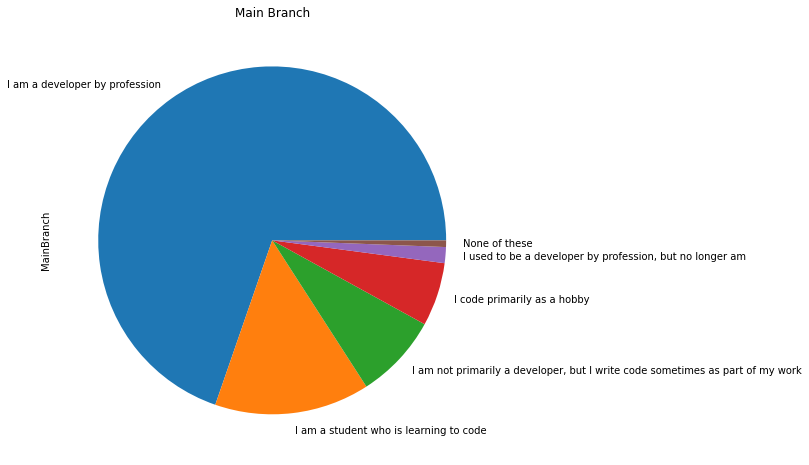

In [26]:
# Proffession of surveyed users
proffession=data['MainBranch'].value_counts()
proffession.plot(kind='pie',figsize=(8,8),title='Main Branch')
plt.show()

<AxesSubplot:>

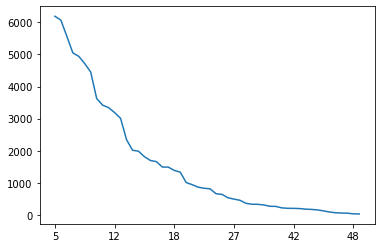

In [27]:
#let's have a look on coding experience ..
# but first, we should clean our data from non numeric values

data.loc[data['YearsCode'] =='Less than 1 year'] = 0
data.loc[data['YearsCode'] =='More than 50 years'] = 50
experience = data['YearsCode'].value_counts()
experience.plot()
#experience.sort_values()

In [ ]:
# separating male and female: 

male = data[data.Gender == 'Man']  
male.shape

In [ ]:
female = data[data.Gender == 'Woman']  #sex = 1 == male?
female.shape

In [ ]:
# now we can see median coding experience for both genders

male.YearsCode.median() 

In [ ]:
female.YearsCode.median() 